In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report


## תיאור הדאטה 

In [265]:
tips = sns.load_dataset("tips")

In [20]:
print(tips.head(7))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2


In [21]:
print(tips.tail(7))

     total_bill   tip     sex smoker   day    time  size
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [22]:
print(tips.shape)

(244, 7)


In [23]:
print(tips.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [24]:
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


## iloc\loc

In [25]:
tips.iloc[2:5, 0:4]

,total_bill,tip,sex,smoker
2,21.01,3.50,Male,No
3,23.68,3.31,Male,No
4,24.59,3.61,Female,No


In [26]:
tips.loc[2:5, "day":]

,day,time,size
2,Sun,Dinner,3
3,Sun,Dinner,2
4,Sun,Dinner,4
5,Sun,Dinner,4


## unique\unique\value_counts

In [27]:
tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [28]:
tips["day"].unique()

4

In [29]:
tips["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [30]:
tips["smoker"].value_counts().reset_index()

,smoker,count
0,No,151
1,Yes,93


In [31]:
most_frequent_day = tips['day'].mode().values[0]
most_frequent_day

'Sat'

In [32]:
new_df = tips[tips['day'] != "Sun"]
new_df

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## שינוי שם של עמודה (rename)

In [33]:
df = tips.rename(columns={'day': 'Day'})

## גרפים

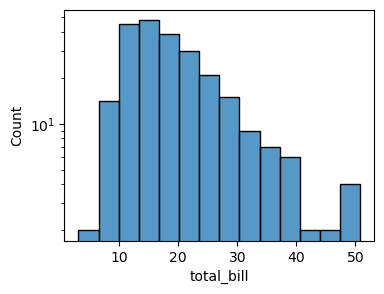

In [34]:
df = tips
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='total_bill')
plt.yscale('log')
plt.show()


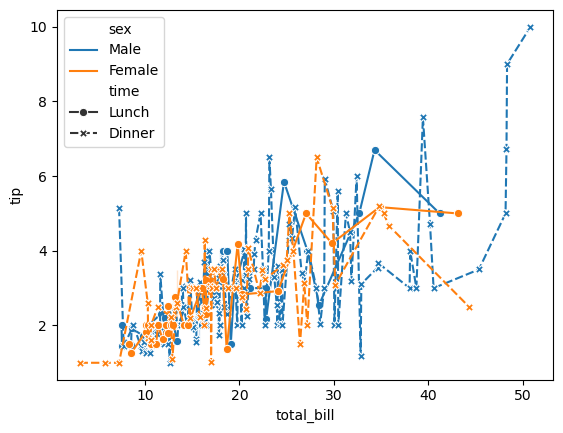

In [35]:
sns.lineplot(data=df, x='total_bill', y='tip', hue='sex', style='time', markers=True)
plt.show()


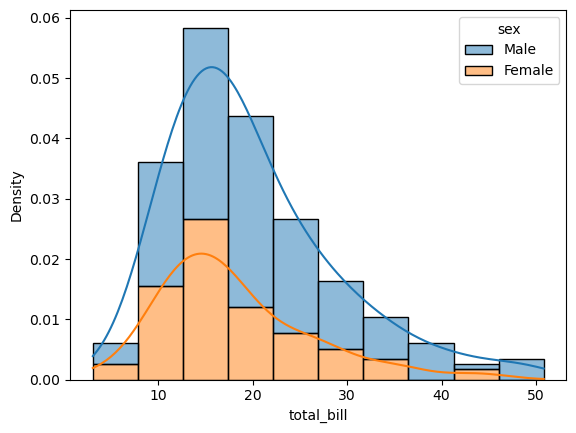

In [36]:
sns.histplot(
    data=df,
    x='total_bill',
    bins=10,
    kde=True,
    stat='density',
    hue='sex',
    multiple='stack'
)
plt.show()


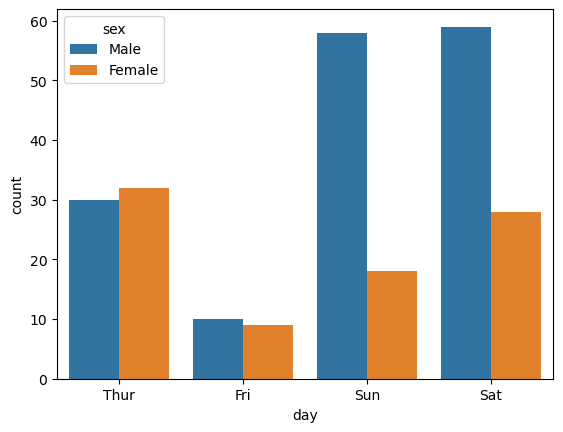

In [62]:
sns.countplot(data=df, x='day', hue='sex',order=["Thur", "Fri", "Sun","Sat"])
plt.show()


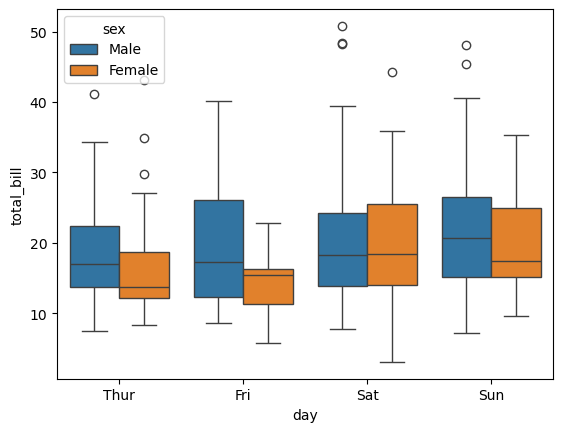

In [38]:
sns.boxplot(data=df, x='day', y='total_bill', hue='sex', showfliers=True)
plt.show()


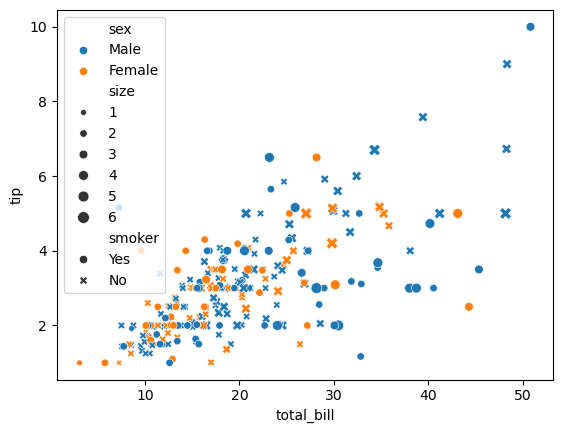

In [22]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', size='size', style='smoker')
plt.show()


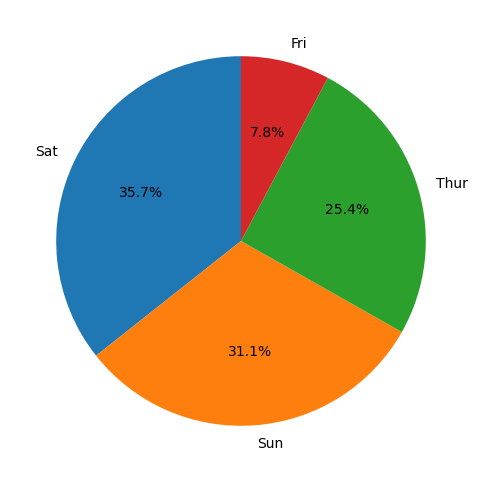

In [23]:
df['day'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), startangle=90)
plt.ylabel('')
plt.show()


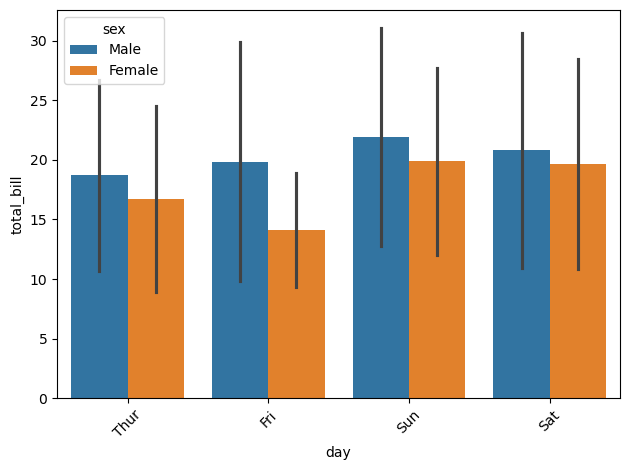

In [70]:
sns.barplot(data=df, x='day', y='total_bill', estimator=np.mean, errorbar='sd', hue='sex',order=["Thur", "Fri", "Sun","Sat"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[(0.0, 40.0)]

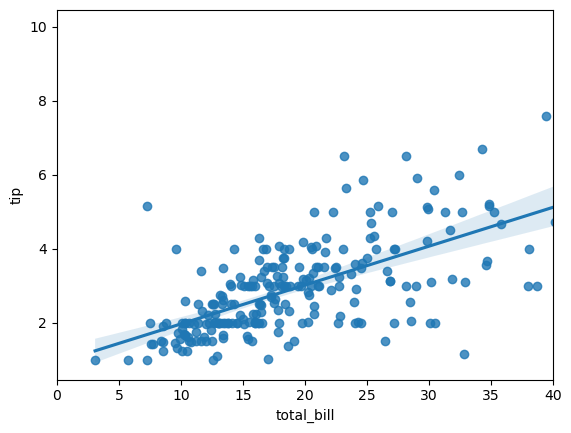

In [25]:
sns.regplot(data=tips, x='total_bill', y='tip').set(xlim=(0, 40))#לחתוך את הציר



## דאטה על רעידות אדמה

In [26]:
df_alerts = pd.read_csv("data_file (3) (1).csv")
df_alerts.head(3)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.0,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.0,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.0,-20.0508,-178.346,NaN,Oceania,Fiji


## FacetGrid

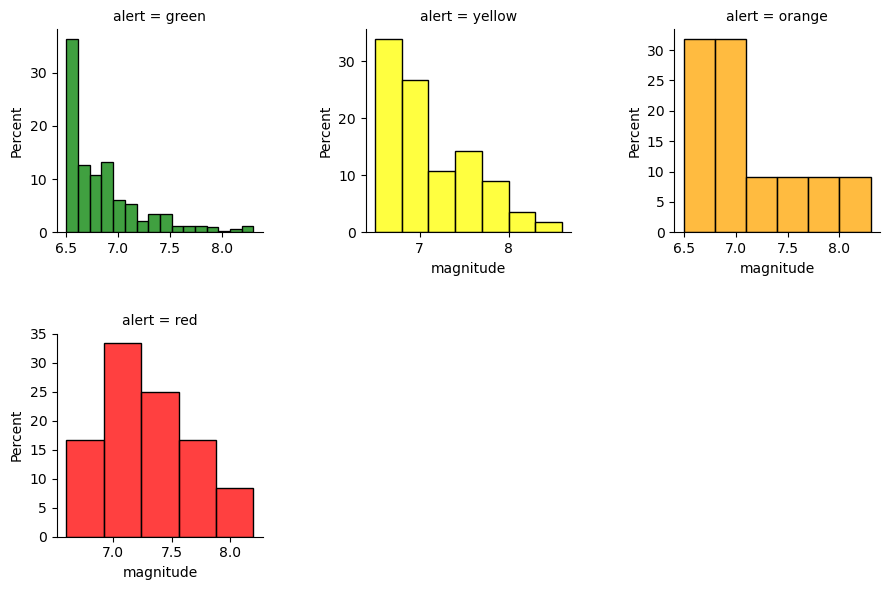

In [27]:
palette = {"green":"green", "yellow":"yellow", "orange":"orange", "red": "red" }
g = sns.FacetGrid(df_alerts, col="alert", col_wrap=3, sharex=False, sharey=False, hue="alert", palette=palette)
g.map_dataframe(sns.histplot, x='magnitude', stat="percent")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


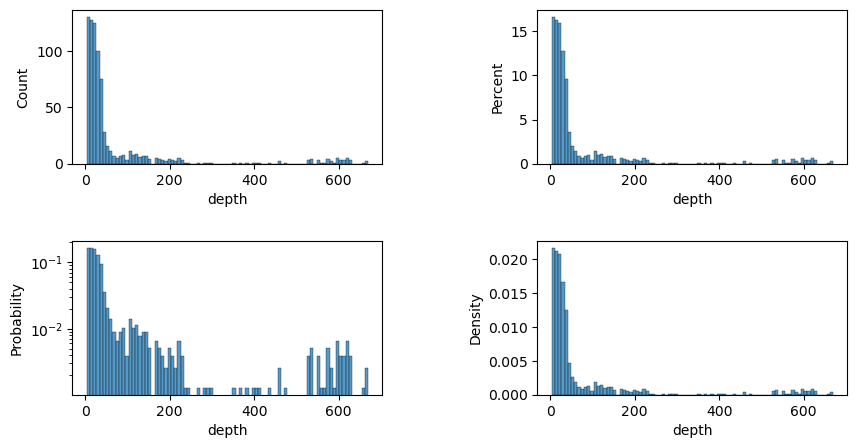

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

sns.histplot(df_alerts, x='depth', ax=ax[0, 0])
sns.histplot(data=df_alerts, x='depth', stat='percent', ax=ax[0, 1])#אחוז
sns.histplot(data=df_alerts, x='depth', stat='probability', ax=ax[1, 0])#הסתברות
ax[1, 0].set_yscale('log')
sns.histplot(data=df_alerts, x='depth', stat='density', ax=ax[1, 1])#צפיפות
plt.show()


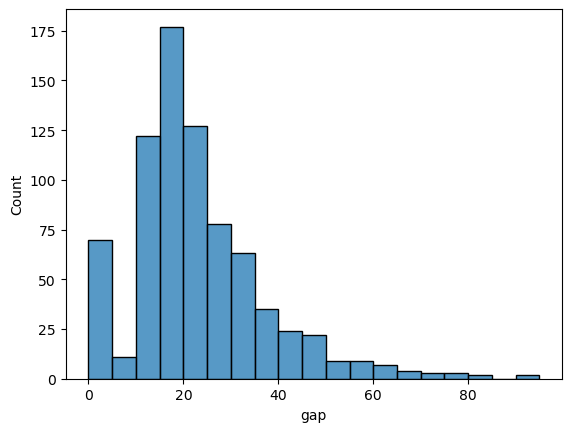

In [29]:
sns.histplot(df_alerts, x='gap', bins=range(0, 100, 5), stat='count')#התפלגות גיל לפי קבוצות של 5
#(0,100,5) התחלה,סוף,קפיצה 

plt.show()

In [30]:
#בודק אם הסטרינג נמצא כחלק או מהתא או כולו
df_alerts_Islands=df_alerts[(df_alerts["country"].str.contains("Islands", na=False))]
df_alerts_Islands[["country"]].head(2)

,country
0,Solomon Islands
144,South Georgia and the South Sandwich Islands


## groupby and sort_values

In [31]:
Ans_Q1 = df_alerts.groupby('alert')['depth'].mean().reset_index()
Ans_Q1

,alert,depth
0,green,114.666720
1,orange,40.246818
2,red,18.549750
3,yellow,44.508071


In [32]:
Ans_Q2= (
    df_alerts.groupby(["alert"])
    .agg(
        depth_mean=('depth', 'mean'), #ממוצע
        depth_count=('depth', 'count'), #כמות
        depth_median=('depth', 'median'),#חציון
        depth_std=('depth', 'std') ,#סטיית תקן
        depth_sum=('depth', 'sum'),#סכום
        depth_min=('depth', 'min'), #מינימום
        depth_max=('depth', 'max') #מקסימום
    ).reset_index())
Ans_Q2

,alert,depth_mean,depth_count,depth_median,depth_std,depth_sum,depth_min,depth_max
0,green,114.666720,325,27.000,187.202916,37266.684,2.70,670.81
1,orange,40.246818,22,20.795,49.957187,885.430,10.00,231.00
2,red,18.549750,12,14.500,12.831077,222.597,8.00,47.39
3,yellow,44.508071,56,24.000,44.742107,2492.452,5.81,146.82


In [303]:
med_df = df_alerts.groupby(['tsunami','alert'])[['depth']].count().unstack(fill_value=0)
med_df

depth                  
alert   green orange red yellow
tsunami                        
0          83     11   7     15
1         242     11   5     41

In [317]:
Ans_Q2= (
    df_alerts.groupby(["alert","tsunami"])
    .agg(
        depth_count=('depth', 'count') #ממוצע
    )).unstack(fill_value=0)
Ans_Q2

depth_count     
tsunami           0    1
alert                   
green            83  242
orange           11   11
red               7    5
yellow           15   41

In [33]:
df_alerts_sort=df_alerts.sort_values("tsunami")#מהקטן לגדול

In [34]:
df_alerts_sort=df_alerts.sort_values("tsunami", ascending=False)#מהגדול לקטן

In [35]:
df_alerts_sort=df_alerts.sort_index(axis=0, ascending=True, inplace=False)

## דאטה על משלוחים

In [36]:
Shipment = pd.read_csv("data_fileB (5).csv")
Shipment.head(3)

,Unnamed: 0,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,date
0,0,1,D,Flight,4,2,177,3,low,F,44,1233,1,2017-02-07
1,1,2,F,Flight,4,5,216,2,low,M,59,3088,1,2017-08-24
2,2,3,A,Flight,2,2,183,4,low,M,48,3374,1,2017-03-14


## הוספות עמודות חודש\שנה\יום

In [37]:
Shipment['date_time'] = pd.to_datetime(Shipment['date'])
Shipment['date_time'] 

0       2017-02-07
1       2017-08-24
2       2017-03-14
3       2017-09-13
4       2017-07-23
           ...    
10994   2017-02-25
10995   2017-07-23
10996   2017-11-22
10997   2017-02-25
10998   2017-01-21
Name: date_time, Length: 10999, dtype: datetime64[ns]

In [38]:
Shipment['month'] = pd.DatetimeIndex(Shipment['date']).month
Shipment['month']

0         2
1         8
2         3
3         9
4         7
         ..
10994     2
10995     7
10996    11
10997     2
10998     1
Name: month, Length: 10999, dtype: int32

In [39]:
Shipment['date'] = pd.to_datetime(Shipment['date'])
Shipment['month_name'] = Shipment['date'].dt.month_name()
Shipment['month_name'] 

0         February
1           August
2            March
3        September
4             July
           ...    
10994     February
10995         July
10996     November
10997     February
10998      January
Name: month_name, Length: 10999, dtype: object

## pivot_table

In [40]:
pivot_df = Shipment.pivot_table(
    index='Mode_of_Shipment',
    columns='Warehouse_block',
    values=["Customer_rating","Cost_of_the_Product","Prior_purchases"],
    aggfunc='count' 
)
pivot_df

Cost_of_the_Product                         Customer_rating  \
Warehouse_block                    A     B     C     D     F               A   
Mode_of_Shipment                                                               
Flight                           297   296   295   297   592             297   
Road                             294   294   294   292   586             294   
Ship                            1242  1243  1244  1245  2488            1242   

                                         Prior_purchases                    \
Warehouse_block      B     C     D     F               A     B     C     D   
Mode_of_Shipment                                                             
Flight             296   295   297   592             297   296   295   297   
Road               294   294   292   586             294   294   294   292   
Ship              1243  1244  1245  2488            1242  1243  1244  1245   

                        
Warehouse_block      F  
Mode_of_Shipment        
Flight             592  
Road               586  
Ship              2488

## להוסיף ערך לעמודות ריקות

In [41]:
Shipment["Mode_of_Shipment"] = Shipment["Mode_of_Shipment"].fillna("Unknown")

In [42]:
Shipment.to_pickle("pickled_strike")
strike_df = pd.read_pickle("pickled_strike")

## melt

In [43]:
lst=["ID","Customer_care_calls","Customer_rating", "Cost_of_the_Product", "Prior_purchases"]
melted_df = pd.melt(Shipment[lst], id_vars = 'ID', value_vars = lst)
melted_df

,ID,variable,value
0,1,Customer_care_calls,4
1,2,Customer_care_calls,4
2,3,Customer_care_calls,2
3,4,Customer_care_calls,3
4,5,Customer_care_calls,2
...,...,...,...
43991,10995,Prior_purchases,5
43992,10996,Prior_purchases,5
43993,10997,Prior_purchases,5
43994,10998,Prior_purchases,6


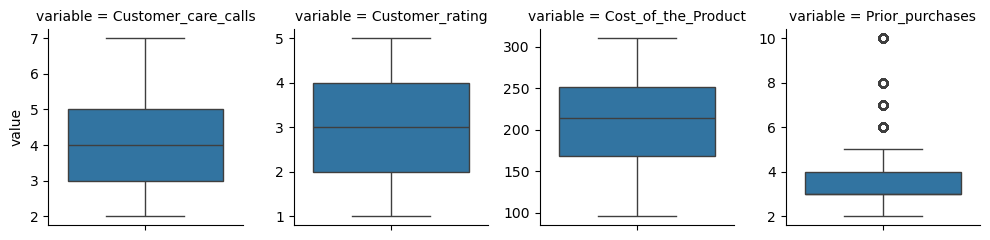

In [44]:
lst=["ID","Customer_care_calls","Customer_rating", "Cost_of_the_Product", "Prior_purchases"]
melted_df = pd.melt(Shipment[lst], id_vars = 'ID', value_vars = lst)
g = sns.FacetGrid(data = melted_df, col="variable",  col_wrap=4, height=2.5, sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

In [45]:
# חיבור של שתי טבלאות אחת מתחת לשניה 
#strike_df = pd.concat([strike_df_18_20 ,strike_df_21_23]).reset_index()

In [46]:
# שינוי שם עמודה (בדוגמא נוריד רווחים)
Shipment.columns = Shipment.columns.str.replace(' ', '')

## בדיקת עמודות ריקות

In [47]:
# בדיקה כמה ערכים ריקים יש 
Shipment.isnull().sum().sort_values(ascending=False)

Unnamed:0              0
Gender                 0
month                  0
date_time              0
date                   0
Reached.on.Time_Y.N    0
Weight_in_gms          0
Discount_offered       0
Product_importance     0
ID                     0
Prior_purchases        0
Cost_of_the_Product    0
Customer_rating        0
Customer_care_calls    0
Mode_of_Shipment       0
Warehouse_block        0
month_name             0
dtype: int64

In [48]:
# למחוק שורות שיש בעמודות ספציפיות שלהן ערך ריק
Shipment_dropna=Shipment.dropna(subset=["Mode_of_Shipment"])

In [49]:
# סינון עמודות לפי type ספציפי
df_num = Shipment.select_dtypes(include=['int', 'float'])
# בחירת עמודות קטגוריות
cat_cols = Shipment.select_dtypes(include=['category'])
# עמודות מספריות בלבד 
num_cols = Shipment.select_dtypes(include=['number'])


## מפת חום

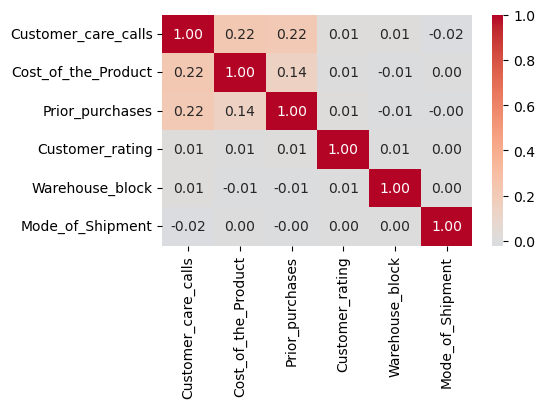

In [222]:
df_1=Shipment[["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases"]].copy()
for col in df_1.columns:
    df_1[col] = df_1[col].astype('category').cat.codes

corrs = df_1.corr(method='kendall')
plt.figure(figsize=(5, 3))
order = np.abs(corrs).sum().sort_values(ascending=False).index
sns.heatmap(corrs.loc[order, order], cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.show()

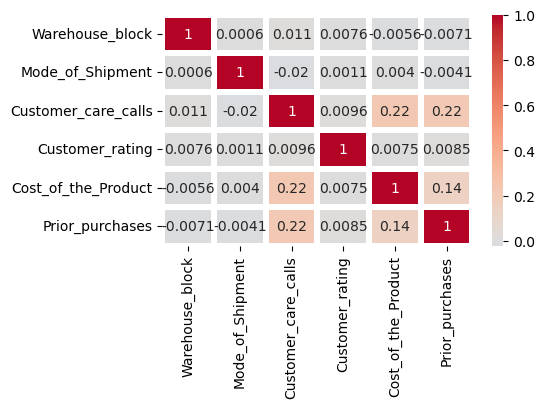

In [51]:
df_1=Shipment[["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases"]].copy()
for col in df_1.columns:
    df_1[col] = df_1[col].astype('category').cat.codes

corrs = df_1.corr(method='kendall')
plt.figure(figsize=(5, 3))
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True, linewidths=4)
plt.show()

In [204]:
correlation_matrix = Shipment.corr(numeric_only = True, method = 'spearman' ).round(2)
correlation_matrix

,Unnamed:0,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,month,Product_importance_mapping
Unnamed:0,1.00,1.00,0.18,-0.01,0.20,0.20,-0.51,0.28,-0.41,-0.01,-0.05
ID,1.00,1.00,0.18,-0.01,0.20,0.20,-0.51,0.28,-0.41,-0.01,-0.05
Customer_care_calls,0.18,0.18,1.00,0.01,0.29,0.27,-0.10,-0.23,-0.06,0.01,-0.05
Customer_rating,-0.01,-0.01,0.01,1.00,0.01,0.01,-0.00,-0.00,0.01,0.00,0.00
Cost_of_the_Product,0.20,0.20,0.29,0.01,1.00,0.19,-0.12,-0.13,-0.07,0.01,-0.04
Prior_purchases,0.20,0.20,0.27,0.01,0.19,1.00,-0.09,-0.23,-0.07,-0.00,-0.02
Discount_offered,-0.51,-0.51,-0.10,-0.00,-0.12,-0.09,1.00,-0.32,0.34,0.00,0.01
Weight_in_gms,0.28,0.28,-0.23,-0.00,-0.13,-0.23,-0.32,1.00,-0.27,0.00,0.08
Reached.on.Time_Y.N,-0.41,-0.41,-0.06,0.01,-0.07,-0.07,0.34,-0.27,1.00,0.00,0.02
month,-0.01,-0.01,0.01,0.00,0.01,-0.00,0.00,0.00,0.00,1.00,0.02


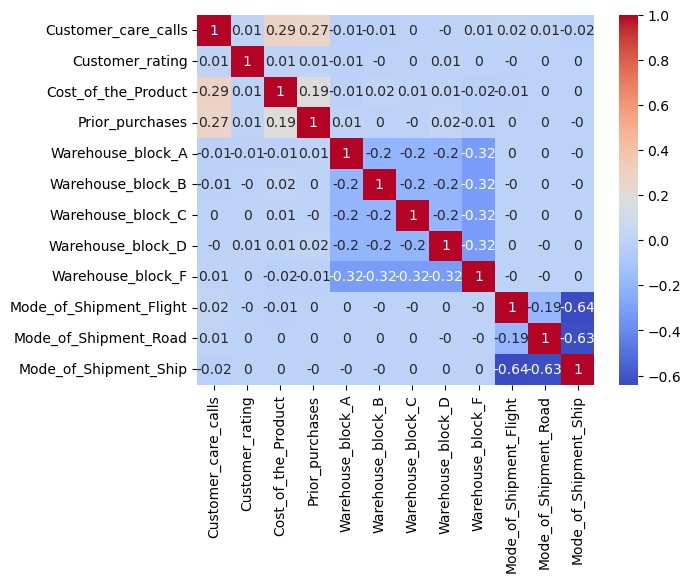

In [253]:
#ללא לולאת FOR
df_1=Shipment[["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases"]].copy()
small_fit = pd.get_dummies(df_1).copy()
correlation_matrix = small_fit.corr()
correlation_matrix = small_fit.corr(method= "spearman").round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## חיזוי לערכים לא רק מספריים

In [242]:
#חיזוי ללא לולאת פור לערכים לא מספריים
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
features = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", "Customer_rating", "Cost_of_the_Product"]
X_raw = Shipment[features].copy()
X = pd.get_dummies(X_raw)
y = Shipment["Prior_purchases"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)
# המשך רגיל

DecisionTreeClassifier()

In [232]:
#חיזוי כשיש גם ערכים לא מספריים
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
features =["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Cost_of_the_Product"]
X = Shipment[features]
y = Shipment["Prior_purchases"]
for col in X.select_dtypes(include='object').columns:
    X.loc[:, col] = X[col].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [54]:
predictions = model.predict(X_test)
predictions

array([2, 4, 4, ..., 3, 2, 2], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("דיוק:", accuracy)


דיוק: 0.33090909090909093


## להפריד ערכים בתוך אותה עמודה

In [56]:
# איך להפריד ערכים בתוך אותה עמודה עם melt
#df.speaks.unique()
#max_comma = int(df.speaks.str.count(",").max())
#list_lan = df["speaks"].str.split(",", n = max_comma, expand = True)
#list_lan
#for i in range(max_comma + 1):
#    df[f"lan{i+1}"] = list_lan[i]

#ids = ['id'] 
#values = ['lan1', 'lan2', 'lan3', 'lan4']
#melted_df = pd.melt(df, id_vars = ids, value_vars = values).copy()
#melted_df = melted_df.rename(columns={'variable':'lan','value':'language'})
#top_languages = melted_df[["language"]].value_counts().reset_index().head(5)

#lst=top_languages["language"].tolist()
#new=melted_df[melted_df["language"].isin(lst)]
#plt.figure(figsize=(10,3))
#sns.countplot(new,x="language")





#במקום הלולאה אפשר לכתוב 
#df["lan1"] = list_lan[0]
#df["lan2"] = list_lan[1]
#df["lan3"] = list_lan[2]
#df["lan4"] = list_lan[3]

## melt מסנן עמודות מספריות

In [57]:
# פה עובדים רק עם משתנים מספריים
features = Shipment.select_dtypes(include='number').columns
melted_mrkt_df = pd.melt(Shipment, id_vars='ID', value_vars=features.drop('ID'))
melted_mrkt_df

,ID,variable,value
0,1,Unnamed:0,0
1,2,Unnamed:0,1
2,3,Unnamed:0,2
3,4,Unnamed:0,3
4,5,Unnamed:0,4
...,...,...,...
98986,10995,month,2
98987,10996,month,7
98988,10997,month,11
98989,10998,month,2


## קודים שימושים

In [58]:
### Unit 7 - EDA on survey data ### 

# merge df
# inner - איפה שיש id משותפים לשתי הטבלאות
# merged_df = pd.merge(df1, df2, on='id', how='inner')

#  המרה של עמודה מסטרינג לאינט שימושי בפירוק טווח
#df["mean_age_range"]=((list_lan[0].astype(int))+(list_lan[1].astype(int)))//2

# המרה של עמודה מאותיות גדולות לקטנות ולהפך 
#df['city'] = df['city'].str.lower()\.upper()
#אות ראשונה גדולה
#df['city'] = df['city'].str.capitalize()

# סינון ערכים לפי ערך ראשון כשמדובר במספר שלם או סטרינג 
#new_df1 = df[df["City_Code"].astype(str).str.startswith("7")]

# סינון ערכים לפי ערך ראשון כשמדובר במספר שלם או סטרינג 
#new_df1 = df[df["City_Code"].astype(str).str.endwith("7")] 

# שינוי שם עמודה
#df = Ans_Q3.rename(columns={'day': 'Day'})

#שגיאה הקשורה לcopy
#df_filter = df_filter.copy()



## map

In [59]:
# map - להפוך קטגורי למספרי (כשיש דירוג)
Product_importance_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}
Shipment['Product_importance_mapping'] = Shipment['Product_importance'].map(Product_importance_mapping)
Shipment.Product_importance_mapping

0        1
1        1
2        1
3        2
4        2
        ..
10994    2
10995    2
10996    1
10997    2
10998    1
Name: Product_importance_mapping, Length: 10999, dtype: int64

## get dummies

In [60]:
## get dummies 
# מעביר ערכים קטגוריים לבינאריים 
all_features=["Mode_of_Shipment","Product_importance","Gender"]
strike_df_dum = pd.get_dummies(Shipment[all_features],dtype=int)
strike_df_dum.head(5)

,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1
2,1,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,1
4,1,0,0,0,0,1,1,0


## דאטה על פרחים-חיזוי

In [61]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
#חיזוי ערכים מספריים בלבד
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.tree import DecisionTreeClassifier
my_model = DecisionTreeClassifier()
my_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [156]:

from sklearn import tree, model_selection
from sklearn.tree import DecisionTreeClassifier, export_text

text_representation = export_text(my_model)
text_representation

'|--- feature_2 <= 2.45\n|   |--- class: Iris-setosa\n|--- feature_2 >  2.45\n|   |--- feature_3 <= 1.75\n|   |   |--- feature_2 <= 4.95\n|   |   |   |--- class: Iris-versicolor\n|   |   |--- feature_2 >  4.95\n|   |   |   |--- feature_3 <= 1.65\n|   |   |   |   |--- class: Iris-virginica\n|   |   |   |--- feature_3 >  1.65\n|   |   |   |   |--- class: Iris-versicolor\n|   |--- feature_3 >  1.75\n|   |   |--- class: Iris-virginica\n'

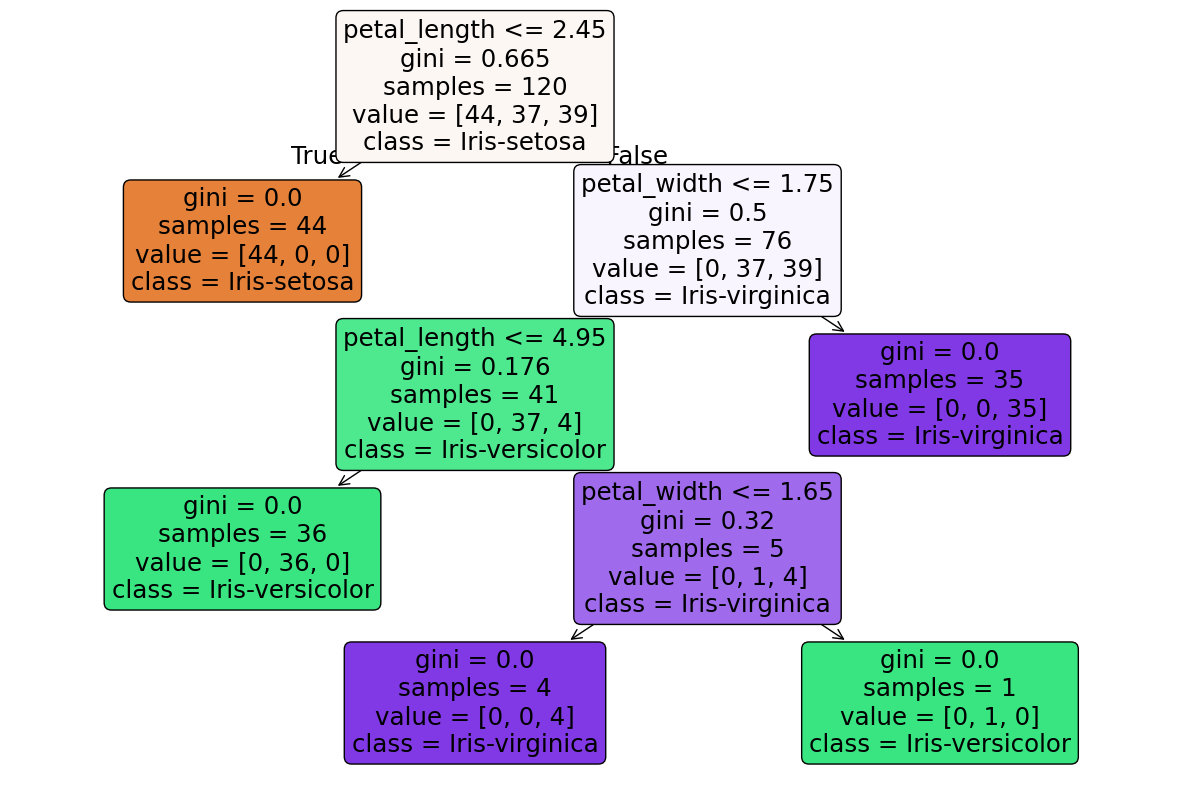

In [157]:
fig = plt.figure(figsize=(15,10))

tree.plot_tree(my_model, 
               feature_names = features, 
               class_names = my_model.classes_,
               filled=True, 
               rounded = True)  
plt.show()

In [159]:
predictions = my_model.predict(X_test)
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [160]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("דיוק:", accuracy)


דיוק: 0.9


In [161]:
# פיצ׳רים חשובים

feature_importances = pd.DataFrame(my_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_length,0.594475
petal_width,0.405525
sepal_length,0.000000
sepal_width,0.000000


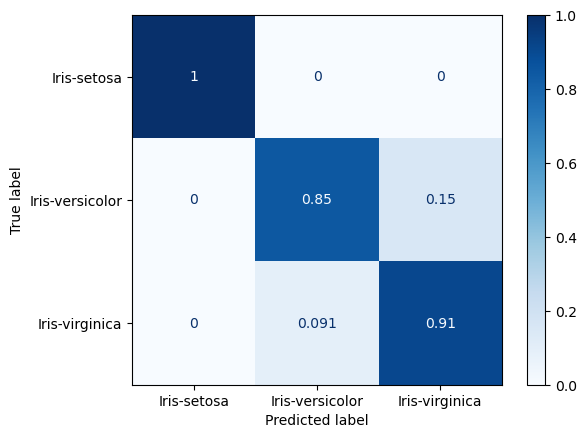

In [163]:
 #מטריצת דיוק
prediction2 = my_model.predict(X_test)
cm = confusion_matrix(y_test, prediction2, labels=my_model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_model.classes_)
disp.plot(cmap=plt.cm.Blues)